# Redwine Regression

## Import packages

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [13, 10]
plt.rcParams['figure.figsize'] = [7, 5]

## Load data & explore data

In [ ]:
!wget -N https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv

--2025-02-19 12:17:56--  https://www.dropbox.com/s/1vvgr9k1sjfjshn/winequality_red.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7 [following]
--2025-02-19 12:17:57--  https://www.dropbox.com/scl/fi/uhmc99xblgvsbpnw0nsog/winequality_red.csv?rlkey=mrgx37uql8qllqr65kpqmlib7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0561268e62ead5425be5017c61.dl.dropboxusercontent.com/cd/0/inline/Ckbr8VcPoMj0EgUY3CMuqT619xiuVXhJ0SL934cnyDtP2G1bPIFYphiL4B06DpWmIYui0GL5VpOqphYciroYGgtaIb-IdfbSlYVwn5bdFNGMAoWcAPT6lGrwWP8RYWG0Fd4/file# [following]
--2025-02-19 12:17:57--  https://uc0561268e62ead5425be5017c61.dl.dropboxusercontent.com/cd/0/inline/C

In [ ]:
#column_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
bos1 = pd.read_csv('winequality_red.csv', delimiter=';')

In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# dimension
bos1.shape

(1599, 12)

In [ ]:
# Check data basic info
# Note!!!!!: max quality = 8
pd.set_option("display.precision", 2)
bos1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


In [ ]:
# correlation
pd.set_option("display.precision", 2)
bos1.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free sulfur dioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total sulfur dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


In [ ]:
#Correlation with output variable
cor = bos1.corr()
cor_target = abs(cor["quality"])
cor_target

,quality
fixed acidity,0.12
volatile acidity,0.39
citric acid,0.23
residual sugar,0.01
chlorides,0.13
free sulfur dioxide,0.05
total sulfur dioxide,0.19
density,0.17
pH,0.06
sulphates,0.25


In [ ]:
#Selecting highly correlated features (more than 0.25)
relevant_features = cor_target[cor_target>0.25]
relevant_features

,quality
volatile acidity,0.39
sulphates,0.25
alcohol,0.48
quality,1.00


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


<Axes: xlabel='quality', ylabel='Count'>

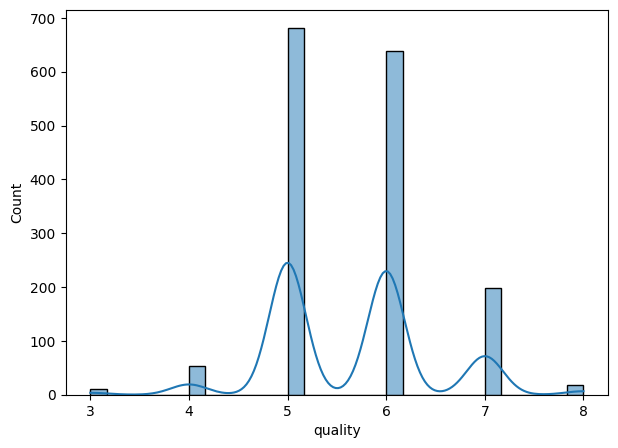

In [ ]:
from scipy import stats
#histogram and normal probability plot
print( bos1.columns )
print( stats.skew(bos1) )

sns.histplot(bos1['quality'], kde=True)

## Variable selection (manually)

In [ ]:
# variable selection
x = bos1.drop(columns=['quality'])
x = x[['volatile acidity','sulphates','alcohol']]
y = bos1["quality"]
print(x.shape)
print(y.shape)

(1599, 3)
(1599,)


## Train / test split

In [ ]:
from sklearn.model_selection import train_test_split
#train data size is 75% and test data size is of 25% of entire data
#When random_state is set to  101, the function will always generate the same train-test split every time the code is run.
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101)

In [ ]:
#fitting model
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
#Display equation
print(x.columns)
print('Intercept:',model.intercept_)
print('Coeff:',model.coef_)

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
Intercept: 2.5380535718159316
Coeff: [-1.24589318  0.65587012  0.32113945]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Create dataframe for actual and predict data
actual_predict = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
actual_predict

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19
...,...,...
1528,6,5.86
647,4,5.40
352,5,5.17
116,6,5.48


In [ ]:
actual_predict.describe()

,Actual,Predict
count,400.00,400.00
mean,5.58,5.68
std,0.85,0.50
min,3.00,4.70
25%,5.00,5.28
50%,6.00,5.61
75%,6.00,6.07
max,8.00,7.43


**NOTE!!!: Predicted values are not outside the range of 0-10, so there is no need to apply bounds. However, we can still bound them to 0-10 just to be sure.**

## Calculate RMSE, R2 before bound

In [ ]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
print( "RMSE = ", round(np.sqrt(mse),2) )
print( "Average quality =", round(y_test.mean(),2) )

# Calculate R^2
print( "R^2 = ", round(model.score(x_test,y_test),2) )

RMSE =  0.72
Average quality = 5.58
R^2 =  0.27


## Calculate RMSE, R2 after bound (same result as before bound)

In [ ]:
# Assume y_test and y_pred are numpy arrays
valid_indices = (y_test >= 0) & (y_test <= 10) & (y_pred >= 0) & (y_pred <= 10)

# Filter out outliers
y_test_filtered = y_test[valid_indices]
y_pred_filtered = y_pred[valid_indices]

# Calculate RMSE
mse = mean_squared_error(y_test_filtered, y_pred_filtered)
print("RMSE =", round(np.sqrt(mse), 2))
print("Average quality =", round(y_test_filtered.mean(), 2))

# Calculate R^2
print("R^2 =", round(model.score(x_test[valid_indices], y_test_filtered), 2))


RMSE = 0.72
Average quality = 5.58
R^2 = 0.27


## Summary Answer

    • Check linearity assumption to target (corr)
    cor_target>0.25

    • Select variables
    volatile acidity, sulphates, alcohol

    • Create model & report equation
    quality =  -1.24589318 * volatile acidity + 0.65587012 * sulphates + 0.32113945 * alcohol + 2.5380535718159316

    • Predict & evaluate RMSE & R2 on test set
    RMSE =  0.72, R^2 =  0.27
    
    • Are there any predicted value out of range?
    No, max predicted value is 8

    • Improve your model (post-processing)
    remove outliner by bound from 0-10 just to be sure.

    • Re-evaluate RMSE & on R-square on test set
    Didn't re-evaluate model because there are no outliers the result will be the same